# Unveiling Patterns of Food Waste: Analyzing ZeroWasteEats Data for Sustainable Solutions


World hunger has been on the rise since 2014, and along with the rising problem of waste, it has become a concern for the environment. The problem of food waste has become more evident with each passing year. Approximately, 13% of food is wasted in harvest and retail combined, meanwhile, 17% is wasted among households. Food waste is an issue because not only does the food go uneaten, but valuable resources–land, water, energy, and labor–are being used in vain since the products are getting discarded. Additionally, waste in landfills is a reason why greenhouse gas emissions have been on the rise, consequently contributing to global warming. In turn, global warming affects crop production as the temperature changes have the potential to decrease crop production, cause unexpected water unavailability, and affect the quality of the food grown–all of which can cause scarcity and increase prices of food. Given all the reasons previously mentioned, we aim to identify trends and understand what factors contribute to food waste, explore any potential correlations with factors that could contribute to food waste, and visualize the data. 


Our analysis will use the dataset provided by the ML Olympiad ZeroWasteEats, which encompasses a variety of attributes including the country, the year of data collection, percentages and quantities of food loss, the specific activities associated with the food, and the stage of the food supply chain. We intend to use various data mining techniques to explore this dataset. By comparing the outcomes derived from different algorithms, our goal is to uncover varying insights and discern patterns that may not be immediately apparent. This comparative approach will allow us to evaluate the effectiveness of each algorithm in revealing correlations and trends within the data, ultimately providing a better understanding of the dynamics of food waste across different contexts concerning the different stages of the food supply chain. Through this analytical process, we aim to identify potential strategies for reducing food waste, thereby contributing to more sustainable food systems globally.


In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
data_food = pd.read_csv("DataFood.csv")
data_country = pd.read_csv("DataCountry.csv")

In [3]:
data_food.shape

(25416, 18)

In [4]:
data_country.shape

(214, 12)

In [5]:
# Before Processing
data_food.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,Storage,"30 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,Storage,"60 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,Storage,"30 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,Storage,"60 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,Storage,"90 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically


## Pre-processing the dataset 
In preparing the ZeroWasteEats dataset for analysis, we first eliminated columns not relevant to our study’s goals. To test various models, we utilized Scikit-learn’s pipeline modules. This enabled us to efficiently test various predictive models by facilitating a seamless integration of data. Then, the dataset was processed for standardization–both numerical and categorical data were identified and handled separately; numerical columns were scaled for normalization, while categorical columns were transformed through one-hot encoding to convert categorical data into a format that could be effectively utilized by the algorithms. Subsequent steps involved merging the dataset with additional country-specific data, followed by a careful elimination of columns that were either redundant or not critical to our analysis, such as ‘m49_code’ and specific data collection method details. Furthermore, we ensured the cleanliness and integrity of our dataset by discarding any rows that lacked information on ‘food_supply_stage’, guaranteeing that our dataset was optimized for conducting a comprehensive analysis on food waste patterns and identifying potential reduction strategies.


In [6]:
data_food = data_food.drop(columns=['reference', 'url', 'notes','country'])

In [7]:
data_food.dtypes

m49_code                      int64
region                       object
cpc_code                     object
commodity                    object
year                          int64
loss_percentage             float64
loss_percentage_original     object
loss_quantity                object
activity                     object
food_supply_stage            object
treatment                    object
cause_of_loss                object
sample_size                  object
method_data_collection       object
dtype: object

In [8]:
data_food.shape

(25416, 14)

In [9]:
# Before Processing
data_country.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [10]:
data_country = data_country.drop(columns=['Source', 'Household estimate (kg/capita/year)','Retail estimate (kg/capita/year)','Food service estimate (kg/capita/year)'])
data_country['combined figures (tonnes/year)'] = data_country['Household estimate (tonnes/year)'] + data_country['Retail estimate (tonnes/year)'] + data_country['Food service estimate (tonnes/year)'] 
data_country = data_country.drop(columns=['Household estimate (tonnes/year)', 'Retail estimate (tonnes/year)', 'Food service estimate (tonnes/year)'])
data_country = data_country.rename(columns={"M49 code":"m49_code", 
                                            "combined figures (kg/capita/year)":"total_kg/capita/year", 
                                            "Confidence in estimate": "conf_in_estimate"

                                            })


In [11]:
data_country.head()

,Country,total_kg/capita/year,conf_in_estimate,m49_code,Region,combined figures (tonnes/year)
0,Afghanistan,126,Very Low Confidence,4,Southern Asia,4755918
1,Albania,127,Very Low Confidence,8,Southern Europe,363201
2,Algeria,135,Very Low Confidence,12,Northern Africa,5782224
3,Andorra,123,Low Confidence,20,Southern Europe,9456
4,Angola,144,Very Low Confidence,24,Sub-Saharan Africa,4547186


In [12]:
data_country.dtypes

Country                           object
total_kg/capita/year               int64
conf_in_estimate                  object
m49_code                           int64
Region                            object
combined figures (tonnes/year)     int64
dtype: object

In [13]:
# Merged data
data_food_country = pd.merge(data_food,data_country, on='m49_code')
data_food_country = data_food_country.drop(columns=['m49_code','sample_size','region','cause_of_loss','treatment','activity','method_data_collection','total_kg/capita/year','loss_quantity', 'Country'])
data_food_country = data_food_country.dropna(subset=['food_supply_stage'])

In [14]:
data_food_country.head()

,cpc_code,commodity,year,loss_percentage,loss_percentage_original,food_supply_stage,conf_in_estimate,Region,combined figures (tonnes/year)
0,23161.02,"Rice, milled",2015,1.78,1.78%,Storage,Very Low Confidence,South-eastern Asia,7005658
1,23161.02,"Rice, milled",2015,11.77,11.77%,Storage,Very Low Confidence,South-eastern Asia,7005658
2,23161.02,"Rice, milled",2015,5.88,5.88%,Storage,Very Low Confidence,South-eastern Asia,7005658
3,23161.02,"Rice, milled",2015,3.57,3.57%,Storage,Very Low Confidence,South-eastern Asia,7005658
4,23161.02,"Rice, milled",2015,17.65,17.65%,Storage,Very Low Confidence,South-eastern Asia,7005658


In [15]:
data_food_country.shape

(21956, 9)

In [16]:
data_food_country = data_food_country.rename(columns={"Region":"region"})


In [17]:
# Some data were lost because rows do not match
data_food_country.shape

(21956, 9)

In [18]:
print(data_food_country.loc[:, data_food_country.isnull().any()])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 66, 67, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 82, 83, 84, 86, 87, 88, 89, 90, 92, 93, 94, 96, 97, 98, 99, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 115, 116, 117, 119, 120, 121, 123, 124, 125, ...]

[21956 rows x 0 columns]


Next we imported packages to run our algorithms

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.special import expit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [20]:
target_name = 'food_supply_stage'
target = data_food_country[target_name]
data = data_food_country.drop(columns=[target_name])
feature_names = data.columns.tolist()
print(feature_names)




numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)



categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns),
    ]
)



['cpc_code', 'commodity', 'year', 'loss_percentage', 'loss_percentage_original', 'conf_in_estimate', 'region', 'combined figures (tonnes/year)']


In [21]:
len(data)

21956

In [22]:

numerical_columns

['year', 'loss_percentage', 'combined figures (tonnes/year)']

In [23]:

categorical_columns


['cpc_code',
 'commodity',
 'loss_percentage_original',
 'conf_in_estimate',
 'region']

We have run four algorithms on our dataset: Log Regression, K-Nearest Neighbors, Random Forest Classifier, and Gradient Boosting Classifier.

In [24]:
target_name = 'food_supply_stage'
target = data_food_country[target_name]
data = data_food_country.drop(columns=[target_name])
feature_names = data.columns.tolist()
print(feature_names)




numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)



categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns),
    ]
)



['cpc_code', 'commodity', 'year', 'loss_percentage', 'loss_percentage_original', 'conf_in_estimate', 'region', 'combined figures (tonnes/year)']


## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)
log_reg_model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
_ = log_reg_model.fit(data_train, target_train)
log_reg_model.score(data_test, target_test)

0.8172709054472581

In [26]:
# Predict the target values for the test set
predicted_labels = log_reg_model.predict(data_test)
print(predicted_labels.shape)
predicted_labels

(5489,)


array(['Farm', 'Whole supply chain', 'Storage', ..., 'Transport', 'Farm',
       'Farm'], dtype=object)

In [27]:
log_reg_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cpc_code', 'commodity',
                                                   'loss_percentage_original',
                                                   'conf_in_estimate',
                                                   'region']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['year', 'loss_percentage',
                                                   'combined figures '
                                                   '(tonnes/year)'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [28]:
len(log_reg_model.steps[1][1].coef_[0].flatten())



4064

In [29]:
# Calculate the confusion matrix
from sklearn import metrics
cm = confusion_matrix(target_test, predicted_labels)
#confusion_matrix = metrics.confusion_matrix(data_test, predicted_labels)

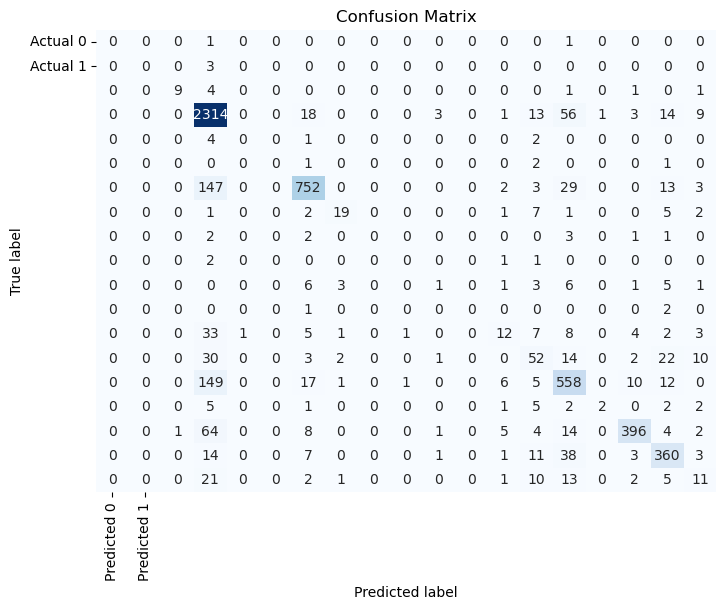

In [30]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [838]:
# from sklearn.metrics import accuracy_score

# #########################################
# # Model fitting and evaluation
# #########################################

# maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

# trainAcc = np.zeros(len(maxdepths))
# testAcc = np.zeros(len(maxdepths))



# index = 0
# for depth in maxdepths:
#     clf = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
#     clf = clf.fit(data_train, target_train)
#     Y_predTrain = clf.predict(data_train)
#     Y_predTest = clf.predict(data_test)
#     trainAcc[index] = accuracy_score(target_train, Y_predTrain)
#     testAcc[index] = accuracy_score(target_test, Y_predTest)
#     index += 1
    
# #########################################
# # Plot of training and test accuracies
# #########################################
    
# plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
# plt.legend(['Training Accuracy','Test Accuracy'])
# plt.xlabel('Max depth')
# plt.ylabel('Accuracy')

## Logitic Regression without preprocessing

In [839]:
# Example above

In [31]:
numerical_columns_selector = selector(dtype_exclude=object)
numerical_columns = numerical_columns_selector(data)
numerical_preprocessor = StandardScaler()
preprocessor_no_one_hot_encoder = ColumnTransformer(
    [
        ("standard_scaler", numerical_preprocessor, numerical_columns),
    ],
    # remainder='passthrough', 
)

log_reg_model_no_hot = make_pipeline(preprocessor_no_one_hot_encoder, LogisticRegression(max_iter=500))
_ = log_reg_model_no_hot.fit(data_train, target_train)
log_reg_model_no_hot.score(data_test, target_test)



0.46438331207870287

In [32]:
log_reg_model_no_hot

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['year', 'loss_percentage',
                                                   'combined figures '
                                                   '(tonnes/year)'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [33]:
coefs = log_reg_model_no_hot.steps[1][1].coef_[0].flatten()


In [34]:
coefs

array([0.92033515, 0.27491254, 0.17607258])

Text(0.5, 0, 'Feature Name')

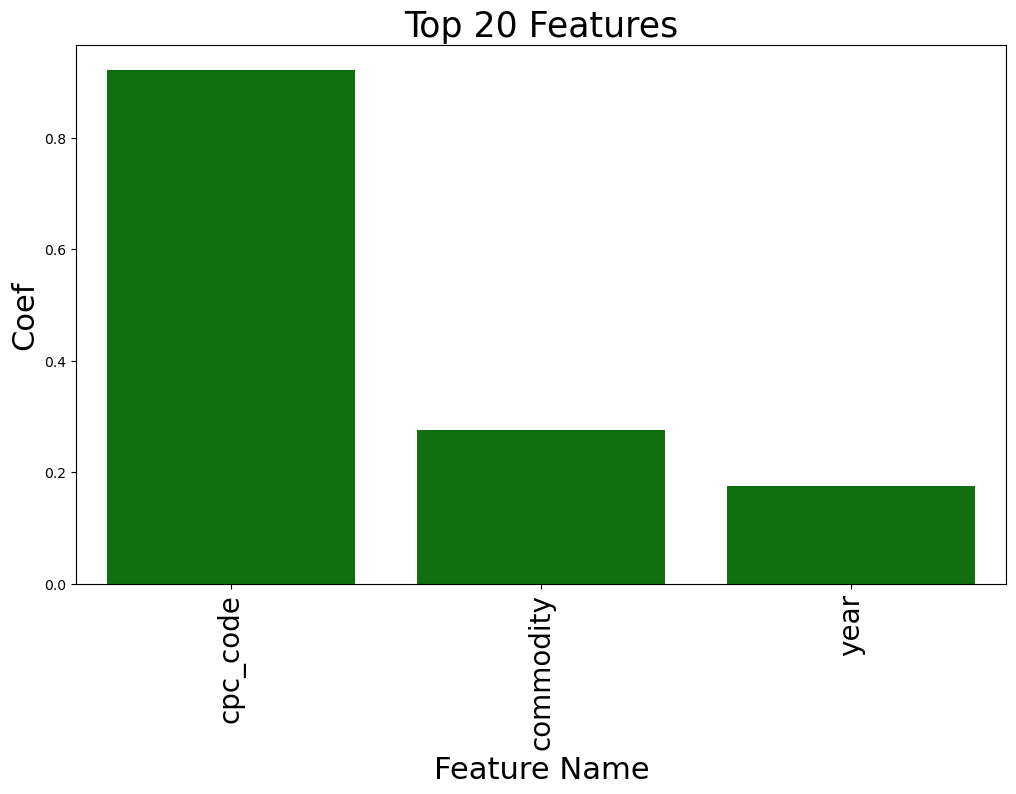

In [35]:
import pandas as pd
# Zip coefficients and names together and make a DataFrame
zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)



In [36]:
# stop stop stop

## Random Forest Classifier 

In [37]:

from sklearn.ensemble import RandomForestClassifier

rfc_model = make_pipeline(preprocessor, RandomForestClassifier(max_depth=2, random_state=0))
clf = rfc_model.fit(data_train, target_train)
rfc_model.score(data_test, target_test)



0.44306795408999816

In [50]:
data_train.columns

Index(['cpc_code', 'commodity', 'year', 'loss_percentage',
       'loss_percentage_original', 'conf_in_estimate', 'region',
       'combined figures (tonnes/year)'],
      dtype='object')

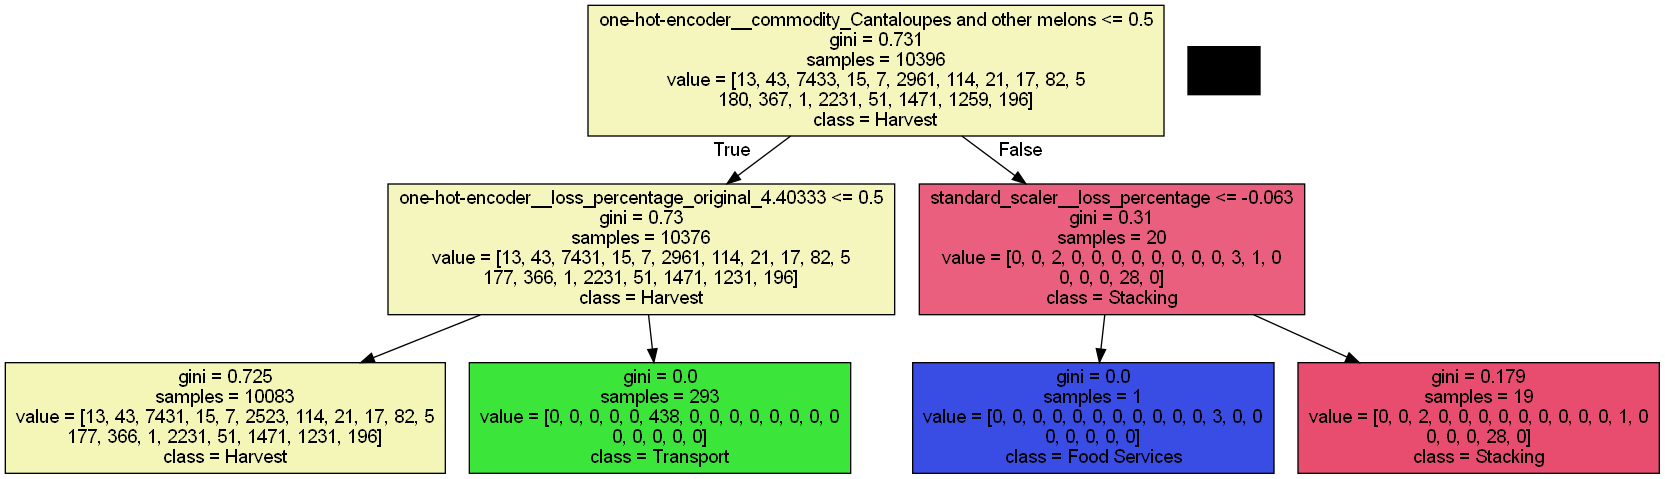

In [52]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Extract a single decision tree from the random forest
tree = rfc_model.named_steps['randomforestclassifier'].estimators_[0]

# Extract feature names after preprocessing
preprocessed_columns = rfc_model.named_steps['columntransformer'].get_feature_names_out(input_features=data_train.columns)

#export_graphviz(tree, out_file='tree.dot', feature_names=data_train.columns, 
                #class_names=target_train.unique(), filled=True, rounded=True, special_characters=True)
    
# dot file
dot_data = export_graphviz(tree, feature_names=preprocessed_columns, class_names=target_train.unique(), filled=True, 
                                out_file=None) 

# convert the dot file to a png image
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [44]:
target_train.unique()

array(['Farm', 'Post-harvest', 'Harvest', 'Whole supply chain', 'Storage',
       'Transport', 'Processing', 'Wholesale', 'Households', 'Retail',
       'Packing', 'Food Services', 'Export', 'Distribution', 'Market',
       'Trader', 'Grading', 'Stacking', 'Pre-harvest'], dtype=object)

In [38]:
rfc_model.steps[1][1].feature_importances_

array([5.43401751e-08, 2.32542236e-02, 1.03255406e-02, ...,
       1.79348446e-02, 2.05771252e-02, 2.47893534e-02])

In [39]:
rfc_model.steps[1][1].feature_importances_


array([5.43401751e-08, 2.32542236e-02, 1.03255406e-02, ...,
       1.79348446e-02, 2.05771252e-02, 2.47893534e-02])

Text(0, 0.5, 'Accuracy')

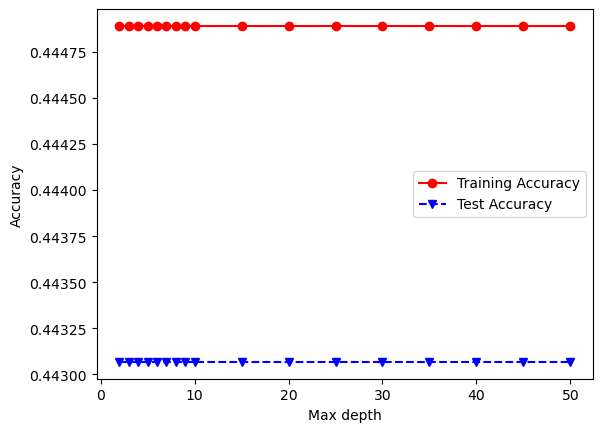

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))



index = 0
for depth in maxdepths:
    clf = make_pipeline(preprocessor, RandomForestClassifier(max_depth=2, random_state=0))
    clf = clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainAcc[index] = accuracy_score(target_train, Y_predTrain)
    testAcc[index] = accuracy_score(target_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

## Gradient Boost Classifier 

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = make_pipeline(preprocessor,GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0) )
_ = gbc_model.fit(data_train, target_train)
gbc_model.score(data_test, target_test)



0.008198214611040262

Text(0, 0.5, 'Accuracy')

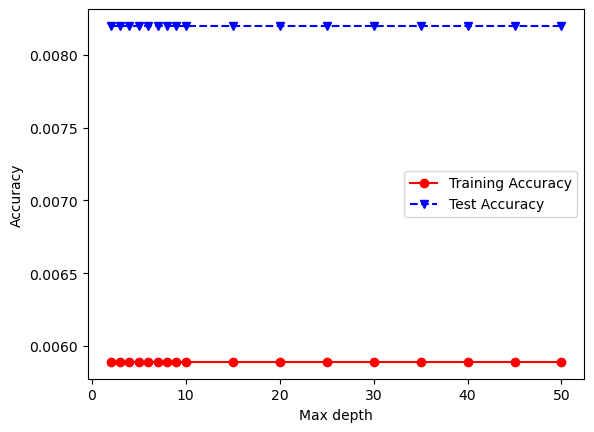

In [41]:
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))



index = 0
for depth in maxdepths:
    clf = make_pipeline(preprocessor,GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0) )
    clf = clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainAcc[index] = accuracy_score(target_train, Y_predTrain)
    testAcc[index] = accuracy_score(target_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

## K-Nearest Neighbors 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=3))
_ = knn_model.fit(data_train, target_train)
knn_model.predict(data_test)
knn_model.score(data_test, target_test)

0.8354891601384588

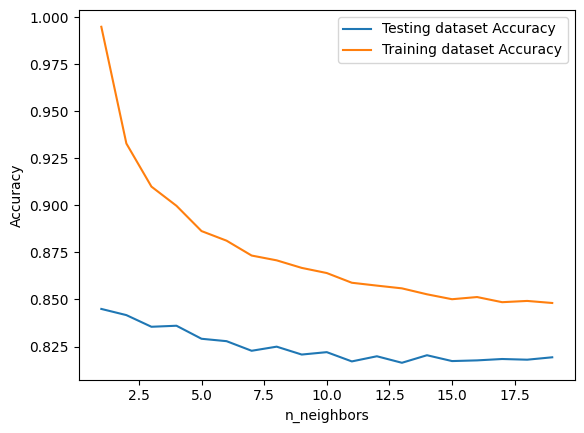

In [ ]:
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
    knn_model = make_pipeline(preprocessor, KNeighborsClassifier(k))
    _ = knn_model.fit(data_train, target_train)
    knn_model.predict(data_test)
    train_accuracy[i] = knn_model.score(data_train, target_train)
    test_accuracy[i] = knn_model.score(data_test, target_test)
      
    # Compute training and test data accuracy 
    #train_accuracy[i] = knn.score(data_train, target_train) 
    #test_accuracy[i] = knn.score(data_test, target_test) 

# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

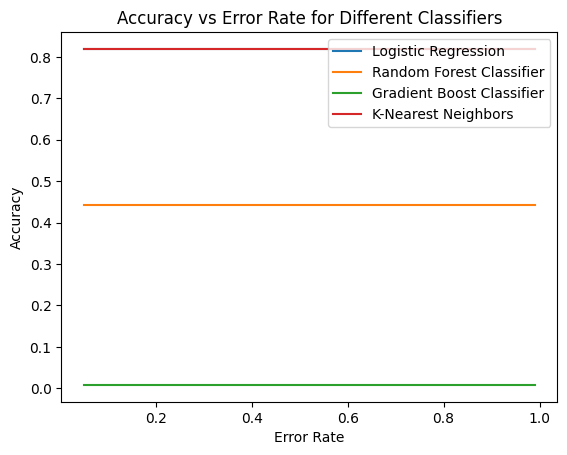

In [ ]:
classifier_names = ["Logistic Regression",
              "Random Forest Classifier",
              "Gradient Boost Classifier",
              "K-Nearest Neighbors"]
classifiers = [log_reg_model, rfc_model, gbc_model, knn_model]

maxdepths = [0.95, 0.90, 0.75, 0.50, 0.01]
error_rate = 1.0 - np.array(maxdepths)

all_scores = []

index = 0
for clf in classifiers:
    name = classifier_names[index]
    scores = []
    for depth in maxdepths:
        #print(depth)
        clf.fit(data_train, target_train)
        score = clf.score(data_test, target_test)
        scores.append(score)
    all_scores.append(scores) 
    #plt.plot(error_rate, scores, label=name)
    index += 1

for name, scores in zip(classifier_names, all_scores):
    plt.plot(error_rate, scores, label=name)

plt.legend(loc="upper right")
plt.xlabel('Error Rate') 
plt.ylabel('Accuracy') 
plt.title('Accuracy vs Error Rate for Different Classifiers')
plt.show()

Logistic Regression and K-NN gave us the best results with over 80% accuracy whereass Gradient Boost was our weakest algorithm with less than 5% accuracy